# Investment Planning for Electricity Generation

*Daniel Cortild, Anastasia Bouwsma, Esteban Castillo Mondragón*

# Contents
- [Part 1](#part-1)
- [Part 2](#part-2)
- [Part 3](#part-3)

## Part 1

In [1]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd
import cvxpy as cp
import time
import gurobipy
import seaborn as sns
from tqdm import tqdm
import function_plot as pl
print(cp.installed_solvers())

n=4
k=3    

['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


### Expected Value Problem

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Objective value: 394.6666666666667
Capacity of each technology: [2.83333333 3.         2.16666667 6.        ]
Investment costs for phase 1: 120.0
Production costs for phase 2: 274.6666666666667


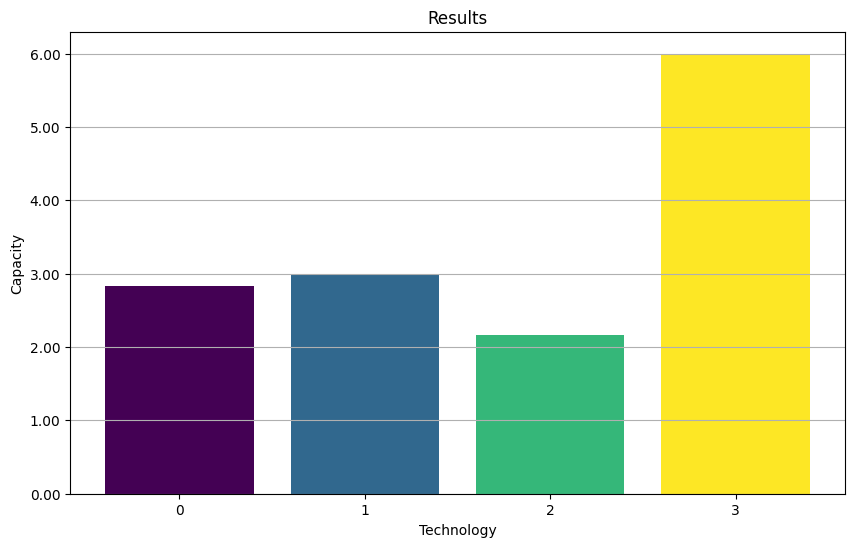

In [2]:

c = [10.,7.,16.,6.]  #costs for instalation
c=c 
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*n+[0]*(len(c)-n)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:n]+[0]*(len(c)-n)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(k-i)+(([0]*i+[1]+[0]*(k-i))*k) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(n+n*i)+[-1]*n+[0]*(len(c)-8-n*i) for i in range(k)]
bub = bub + [-5,-3,-2]

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res= problem.solve(solver = cp.GUROBI)
avres=list(x.value[0:n])
precost=sum([c[i]*x.value[i] for i in range(n)])
prodcost=sum([c[i]*x.value[i] for i in np.arange(n,len(x.value))])
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

### Expected Value Solution

In [3]:
#function to test the average sollution in practice
#c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= [v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
#Aub = [[-1]*4+[0]*(len(c)-4)]
#bub=[-7-4-3]
#budget
#Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
#bub.append(120)

#phase 2 constraints
#capacity
Aub =[[0]*(12*j)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-12-12*j ) for j in range(len(probs)) for i in range(n) ]
bub =  avres*len(probs)

#power requirement
Aub = Aub + [[0]*(4*i+12*j)+[-1]*4+[0]*(len(c)-4-4*i-12*j) for j in range(len(probs)) for i in range(k)]

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res3= problem.solve(solver = cp.GUROBI)
print(res3+precost)

399.5926666666667


### Recourse Problem

[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
328
[0, 0, 0, 

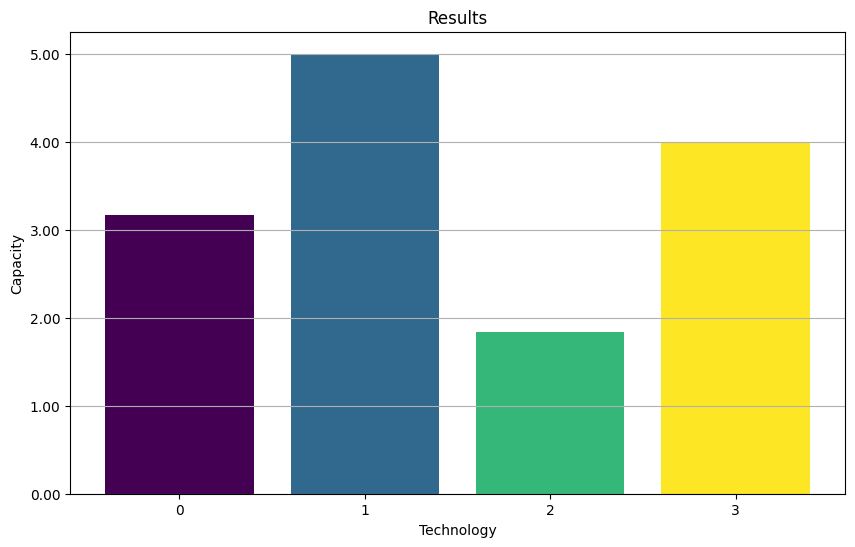

In [4]:
c = [10.,7.,16.,6.]  #costs for instalation
#costs
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]

c= c+[v*i*p for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5] ]#add cost of usage

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*(i )+[-1]+[0]*(3-i+12*k)+(([0]*i+[1]+[0]*(3-i))*3)+[0]*(len(c)-16-12*k ) for k in range(len(probs)) for i in range(4) ]
print(Aub[-1])
print(len(c))
bub = bub+ [0]*4*len(probs)

#power requirement
Aub = Aub + [[0]*(4+4*i+12*k)+[-1]*4+[0]*(len(c)-8-4*i-12*k) for k in range(len(probs)) for i in range(3)]
print(Aub[-1])

bub = bub +[i  for t in range(len(demands)) for i in demands[t] ] 

x=cp.Variable(len(c))
Aub = np.array(Aub)
c= np.array(c)
bub = np.array(bub)
restricts=[Aub @ x <= bub]+ [x >= 0]
problem = cp.Problem(cp.Minimize(c.T @x),restricts )

res2= problem.solve(solver = cp.GUROBI)
pl.print_solution(x,c,n)
pl.plot_result(x,c,n)

### Perfect Information

In [5]:
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
c = [10.,7.,16.,6.]  #costs for instalation
#costs
c= c+[v*i for v in [10,6,1]   for i in [4,4.5,3.2,5.5]]

#phase 1 constraints
#energy requirement constraign
Aub = [[-1]*4+[0]*(len(c)-4)]
bub=[-7-4-3]
#budget
Aub=Aub+[c[0:4]+[0]*(len(c)-4)]
bub.append(120)

#phase 2 constraints
#capacity
Aub = Aub +[[0]*i+[-1]+[0]*(3-i)+(([0]*i+[1]+[0]*(3-i))*3) for i in range(n)]
bub = bub+ [0]*n

#power requirement
Aub = Aub + [[0]*(4+4*i)+[-1]*4+[0]*(len(c)-8-4*i) for i in range(k)]

costs = []
for a in range(len(demands)):
    #costs = costs+[linprog(c=c, A_ub = Aub, b_ub = bub+(demands[a])).fun*probs[a]]
    #print(sum(costs))  
    x=cp.Variable(len(c))
    Aub = np.array(Aub)
    c= np.array(c)
    b_ub_temp = np.array(bub+demands[a])
    restricts=[Aub @ x <= b_ub_temp]+ [x >= 0]
    problem = cp.Problem(cp.Minimize(c.T @x),restricts )

    costs=costs+[problem.solve(solver = cp.GUROBI)*probs[a]]
print(f"Total costs: {sum(costs)}")

Total costs: 394.9666666666667


## Part 2

[0, 1, 2, 3]
4054
-var901[4049 4050 4051 4052 4053] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var901[3] @ 0.9175605036919704 + -var901[4042 4047 4052] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 410.7083474185067
Capacity of each technology: [5.65594005 5.33199101 0.         1.60939404 3.        ]
Investment costs for phase 1: 103.86370187511292
Production costs for phase 2: 306.84464554339274


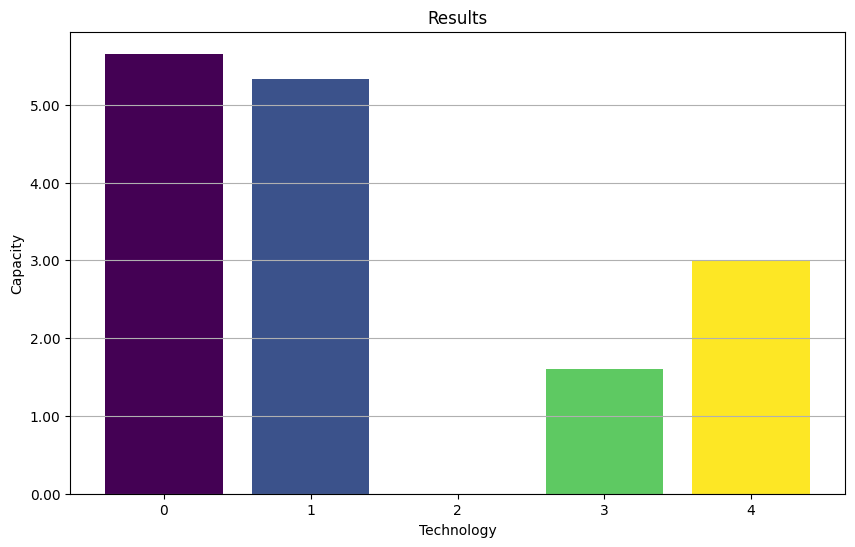

Time taken in seconds 1.9571871757507324


In [6]:
nreal = 10
n=5
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

[0, 1, 2, 3]
14179
-var41448[14174 14175 14176 14177 14178] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var41448[3] @ param41447[139] + -var41448[14167 14172 14177] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 409.5977917005981
Capacity of each technology: [6.6329017  4.23307722 0.         1.70524815 3.        ]
Investment costs for phase 1: 106.28461789952675
Production costs for phase 2: 303.313173801074


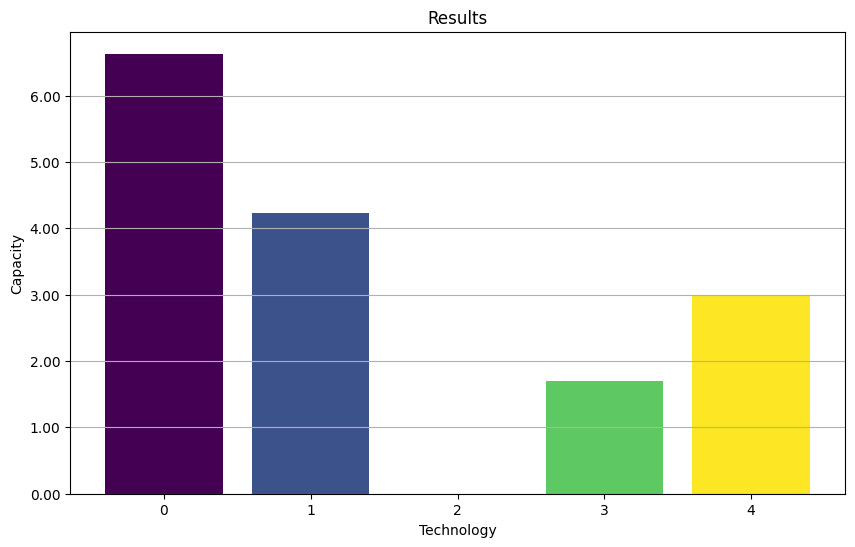

Time taken in seconds 92.3065197467804


In [7]:
nreal = 35
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

Objective value: 411.2812136349182
Capacity of each technology: [4.52922057 6.72735203 0.         1.38447264 3.        ]
Investment costs for phase 1: 100.78307720531691
Production costs for phase 2: 310.49813642960015


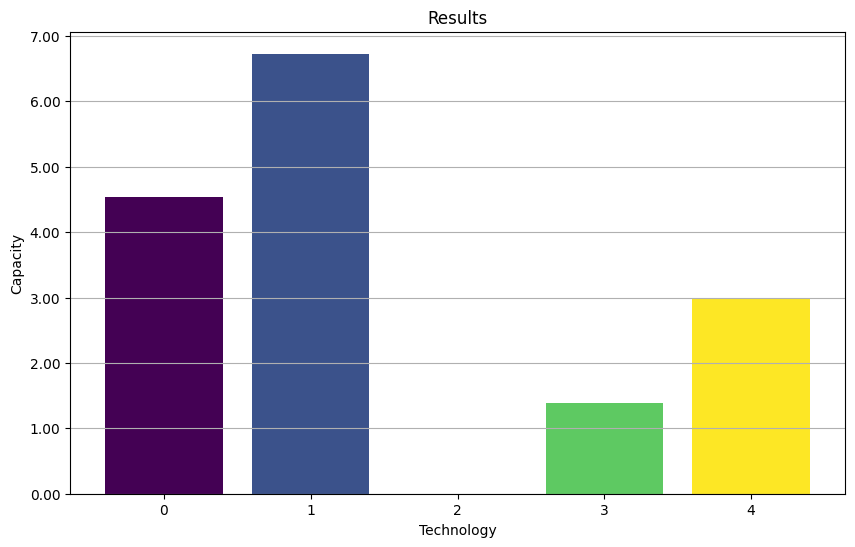

In [8]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

In [9]:
params =[]
values = []
for o in tqdm(range(150)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

100%|██████████| 150/150 [01:04<00:00,  2.32it/s]


[np.float64(410.32437561048494), np.float64(409.7183719761351), np.float64(411.78098505549764), np.float64(411.7809010224989), np.float64(409.42581714403434), np.float64(410.5787771781718), np.float64(410.9619113809503), np.float64(411.29568674893676), np.float64(412.6718103952063), np.float64(411.60061465655303), np.float64(411.0073878269552), np.float64(409.3771211181895), np.float64(409.8710084151178), np.float64(410.5853224639376), np.float64(411.6958354017877), np.float64(410.727292620317), np.float64(412.36759127506326), np.float64(410.15553245498324), np.float64(409.220814570159), np.float64(411.7349156280852), np.float64(408.3006455996653), np.float64(409.56127611495094), np.float64(409.60842786897985), np.float64(410.8013186843642), np.float64(411.3748413331897), np.float64(411.3425754553215), np.float64(410.0693108135636), np.float64(412.18193135022017), np.float64(409.9765637081276), np.float64(411.36022084982903), np.float64(410.8018197205747), np.float64(409.8538521317352)

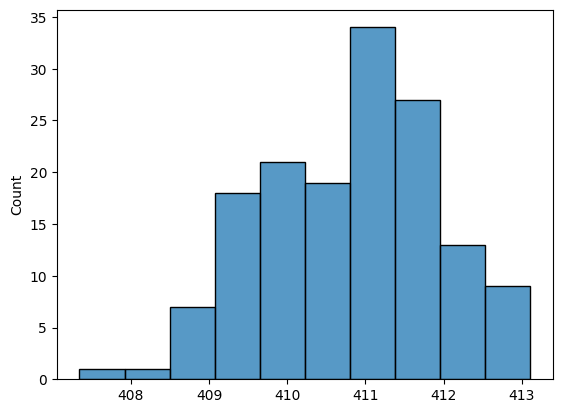

In [10]:
import seaborn
import pandas
print(values)
print(params)
seaborn.histplot(values)
paramar = pandas.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))

[0, 1, 2, 3]
405
-var190805[400 401 402 403 404] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= param190806[3] @ param190804[3] + -var190805[393 398 403] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100


/Users/ecastillo/personal/rug/Optimization-under-Uncertainty/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


Objective value: 238.18970045743913
Capacity of each technology: [0. 0. 3. 0. 0.]
Investment costs for phase 1: 2.592
Production costs for phase 2: 235.59770045743912


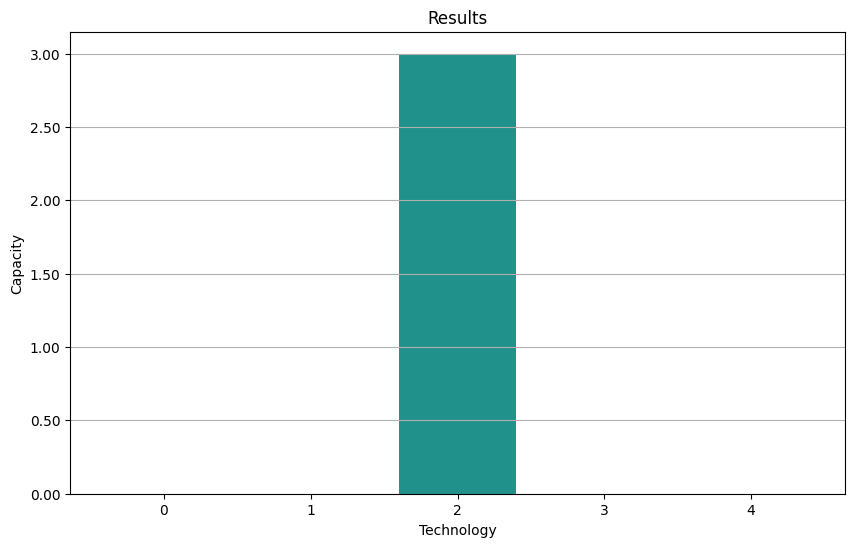

Time taken in seconds 0.1314680576324463


In [11]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/cases for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = costsvec*cases

rqual= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
rqual = cp.Parameter(shape=cases*4 ,value=[rqual[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])

#randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)]
x=cp.Variable(len(cset) )
capacities= cp.Parameter(shape=4, value=[10]*4)

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//3)%27][k%3] for k in range(cases*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*rqual[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*cases) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)
print(f'Time taken in seconds {t2-t1}')

In [12]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        rqual.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

[[np.float64(0.8987241537616318), np.float64(0.7767064583599553), np.float64(0.6691359869687816), np.float64(0.9477289305597105)], [np.float64(0.8638313997117262), np.float64(0.7334586633563044), np.float64(0.7093206978139389), np.float64(0.9934866301615985)], [np.float64(0.8443284489026799), np.float64(0.7862831803066241), np.float64(0.5439863902863913), np.float64(0.911098388230294)], [np.float64(0.7993257793938072), np.float64(0.7812072927271355), np.float64(0.5567226055461915), np.float64(0.9626907107053043)], [np.float64(0.7358868749608003), np.float64(0.7753033652887539), np.float64(0.6543028490355901), np.float64(0.9935265480977284)], [np.float64(0.7415317298033983), np.float64(0.7321984181921342), np.float64(0.7174076887319379), np.float64(0.905067357813357)], [np.float64(0.8584042946786644), np.float64(0.7867233417470375), np.float64(0.5104317699652706), np.float64(0.9538432487614112)], [np.float64(0.6747781741834735), np.float64(0.7682731829716147), np.float64(0.6492728501962

100%|██████████| 150/150 [15:36<00:00,  6.24s/it]


[6.14139296 4.86483967 0.         1.52596498]
409.18519910081943
104.62359715863272


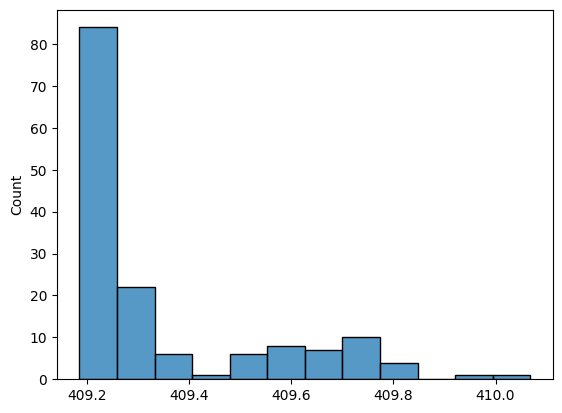

In [13]:
seaborn.histplot(valuevector)

print(params[ valuevector.index(min(valuevector))])
optipars = params[ valuevector.index(min(valuevector))]
print(min(valuevector))
print(sum( [params[ valuevector.index(min(valuevector))][k]*[10.,7.,16.,6.][k] for k in range(4)]))

In [14]:
paramar.to_csv("BackupStorage-paramtests")
pandas.DataFrame(valuevector).to_csv("BackupStorage-results")
pandas.DataFrame(values).to_csv("BackupStorage-initialoutcomes")



In [15]:
import pandas
paramar = pandas.read_csv("BackupStorage-paramtests")
paramar = paramar[["one", "two", "three", "four"]]
params = paramar.values.tolist()
valuevector = pandas.read_csv("BackupStorage-results")
valuevector = valuevector["0"].to_list()
values  =pandas.read_csv("BackupStorage-initialoutcomes")
values = values["0"].to_list()
t=[0,0,2]

### Expected Value Problem

[0, 1, 2, 3]
409
-var22350522[404 405 406 407 408] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var22350522[3] @ 0.9500000000000001 + -var22350522[397 402 407] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 409.7052456140353
Capacity of each technology: [6.66666667 4.         0.         2.10526316 3.        ]
Investment costs for phase 1: 110.53824561403509
Production costs for phase 2: 299.167


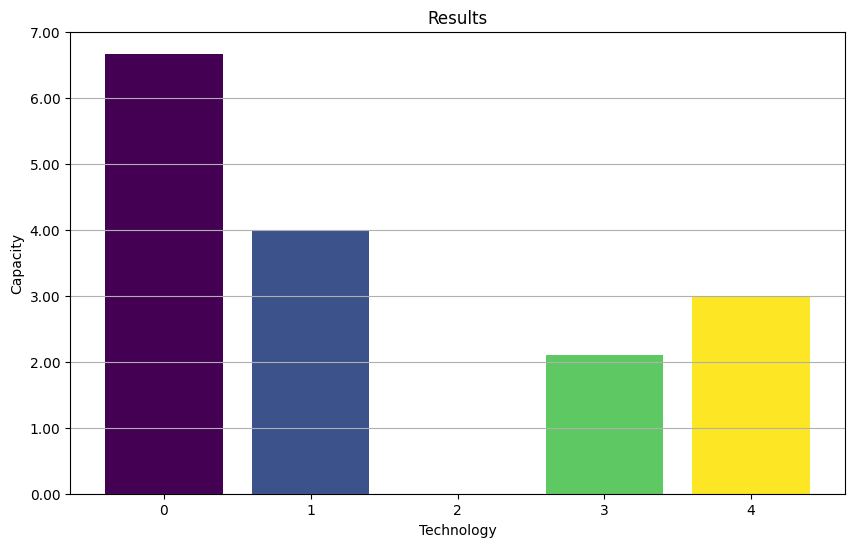

Time taken in seconds 0.1310257911682129


In [16]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= [0.5]*4
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])


cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

    
t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

avph11= x.value[0:4]

In [18]:
ntests=1000
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
Vtestvec = []
#curval =sum([optipars[i]*[10.,7.,16.,6.][i] for i in range(4)]) 
curval =avph11@[10.,7.,16.,6.]
print(curval)
q = 0
for t in tqdm(rndvl):
    rqual.value = t
    lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
    Vtestvec =Vtestvec+[curval +lilproblem.value] 
    q=q+1
print(np.mean(Vtestvec))
print(np.sqrt(np.var(Vtestvec)))

[[np.float64(0.8336124917073136), np.float64(0.7157881101610896), np.float64(0.7035896477352982), np.float64(0.9671158489760848)], [np.float64(0.6386897762125681), np.float64(0.7251804816809815), np.float64(0.7985905438713714), np.float64(0.9492598930515473)], [np.float64(0.6661028512638895), np.float64(0.7173578970765587), np.float64(0.5415138097018991), np.float64(0.9344043445784037)], [np.float64(0.7526862617726828), np.float64(0.7596672956602553), np.float64(0.5288170017632563), np.float64(0.9882344826992113)], [np.float64(0.8004219115250489), np.float64(0.7926583449748003), np.float64(0.5314297999918427), np.float64(0.990338895806373)], [np.float64(0.6513442752813602), np.float64(0.7666140076323585), np.float64(0.6819627715755985), np.float64(0.9722967585565765)], [np.float64(0.8621904414019368), np.float64(0.7546054260632005), np.float64(0.6548920029330957), np.float64(0.9389592267757465)], [np.float64(0.8900074814725389), np.float64(0.7889890699247784), np.float64(0.768863081042

100%|██████████| 1000/1000 [02:04<00:00,  8.04it/s]

412.8611811101838
7.623201517770993


In [19]:
import scipy
import scipy.spatial
Tree = scipy.spatial.KDTree(params)
print(Tree.query(avph11))
print(params[Tree.query(avph11)[1]] )
print(valuevector[Tree.query(avph11)[1]])
min(valuevector)
print(avph11)
for k in paramar.columns:
    print(k)
    print(np.mean(paramar[k]))
    print(np.var(paramar[k]))

(0.4493823644141924, np.int64(138))
[6.491849408871808, 4.294792663842334, 0.0, 1.8146074833099863]
409.244833494963
[6.66666667 4.         0.         2.10526316]
one
5.617450903297208
0.409893742789245
two
5.435099174022884
0.5553251823128265
three
0.0
0.0
four
1.5931497236030456
0.014137450593315594


### Perfect Information

[0, 1, 2, 3]
409
-var26667459[404 405 406 407 408] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= var26667459[3] @ param26667458[3] + -var26667459[397 402 407] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 418.03752130378575
Capacity of each technology: [ 0.         11.33318     0.          2.08304355  0.        ]
Investment costs for phase 1: 91.83052130378564
Production costs for phase 2: 326.20699999999994


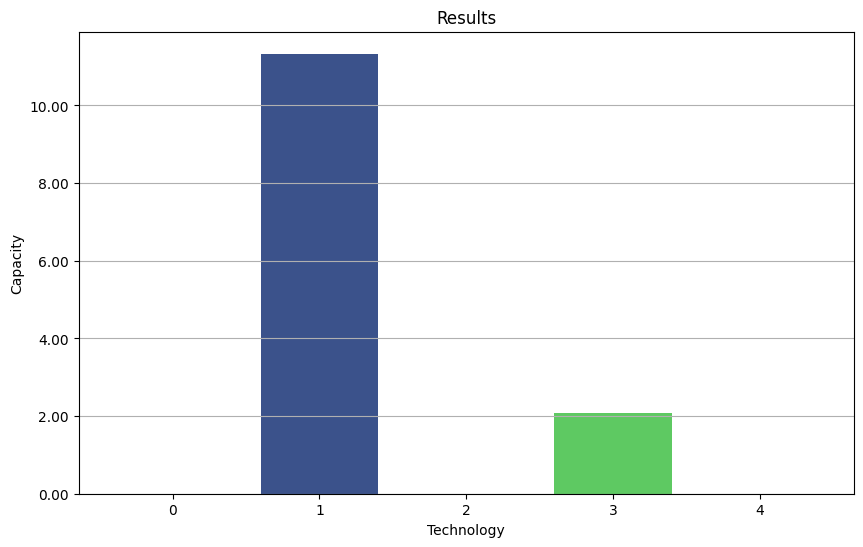

Time taken in seconds 0.14779996871948242


In [20]:
nreal = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
costsvec= [v*i*p/nreal for p in probs for v in [10,6,1]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage
cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals = cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//3)%27][k%3] for k in range(nreal*27*3)]
print([0,1,2,3,4][0:4])
print(len(cset))
print(constr[-1])
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//27)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(27*nreal) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [21]:
params =[]
values = []
for o in tqdm(range(4000)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]

100%|██████████| 4000/4000 [00:29<00:00, 135.93it/s]


In [22]:
np.mean(values)

np.float64(407.288629894102)

<Axes: ylabel='Count'>

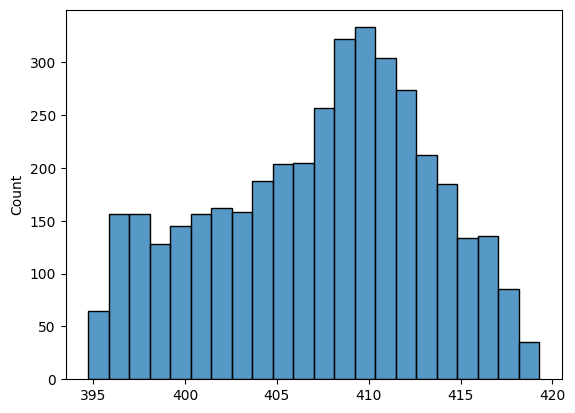

In [23]:
seaborn.histplot(values)

## Part 3

30784
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 408.12095529979933
Capacity of each technology: [6.0863593  4.6073532  0.         1.75069904 3.        ]
Investment costs for phase 1: 103.68064907803098
Production costs for phase 2: 304.44030622177246


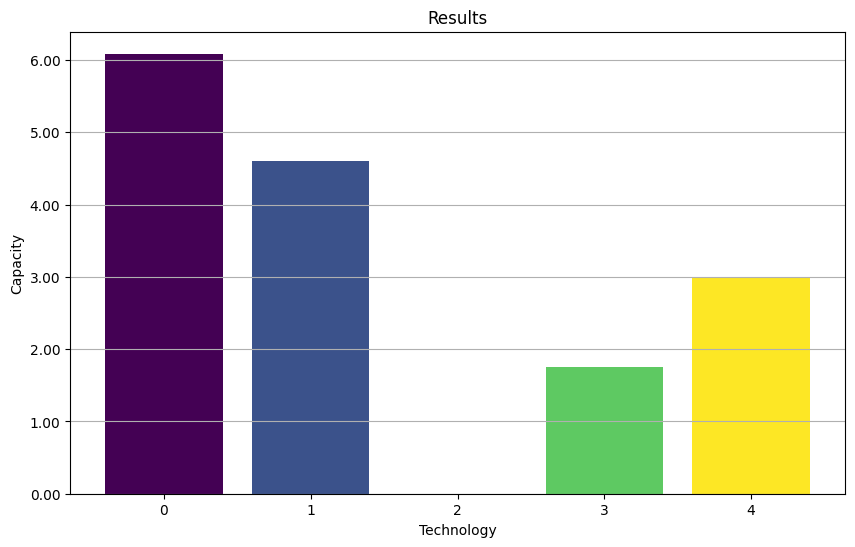

Time taken in seconds 248.63782811164856


In [24]:
nreal = 19
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/nreal for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage

cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals =  cp.Parameter(shape=nreal*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5+4]@multidin2<= demands[(k//12)%27][k%3] for k in range(nreal*27*3*4)]
#capacity
base= np.array([4,9,14]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//108)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(108*nreal) for k in range(4)]

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [25]:
rndvl= np.random.uniform(size=nreal*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:4])
print(problem.value)
print(x.value[0:4]@[0.9,0.8,0.8,1.])
print(x.value[0:4]@cinstall)

[5.63861598 5.31129898 0.         1.74635676]
411.83094937586407
11.070150328073371
104.04339322264487


100%|██████████| 150/150 [02:32<00:00,  1.01s/it]

[np.float64(412.47500875017874), np.float64(410.989731806684), np.float64(411.0815581133865), np.float64(411.6546266311038), np.float64(411.6170582922899), np.float64(409.8321712660537), np.float64(411.28114675806444), np.float64(410.9185098142426), np.float64(412.5022732123242), np.float64(409.70201541964855), np.float64(408.9700406524649), np.float64(412.93029803381785), np.float64(410.3201904307308), np.float64(411.00712089166893), np.float64(413.2924425596878), np.float64(413.4442019982761), np.float64(412.1134491139841), np.float64(410.25591809874845), np.float64(413.02401496741845), np.float64(409.54117162166096), np.float64(406.66059796356456), np.float64(410.61065183791766), np.float64(411.76495709360745), np.float64(413.4473098277171), np.float64(411.17517769181734), np.float64(412.37060842444384), np.float64(408.59534014810833), np.float64(414.7179210125964), np.float64(408.7976635255526), np.float64(408.03081016847403), np.float64(412.53397928601294), np.float64(409.85074406

<Axes: ylabel='Count'>

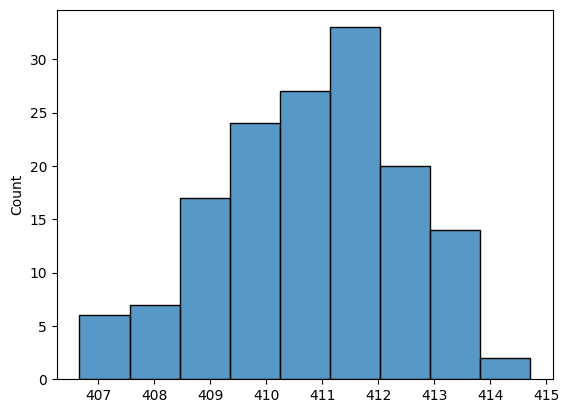

In [29]:
params =[]
values = []
for o in tqdm(range(150)):
    rndvl= np.random.uniform(size=nreal*4)
    randvals.value = [rndvl[x*4+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(4)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values = values + [problem.value]
    params = params + [x.value[0:4]]
print(values)
print(params)
sns.histplot(values)    

0.0


<Axes: ylabel='Count'>

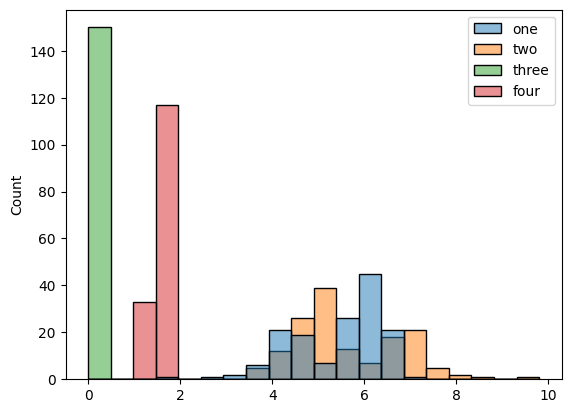

In [30]:
paramar = pd.DataFrame(params,columns=["one","two","three","four"] )
print(max(paramar["three"]))
sns.histplot(paramar,binwidth=0.5)

1620
[0, 1, 2, 3]
-var26996021[1615 1616 1617 1618 1619] @ [1. 1. 1. 1. 1.] <= -3.0
0.0 <= param26996022[3] @ param26996020[3] + -var26996021[1608 1613 1618] @ [1. 1. 1.]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100


/Users/ecastillo/personal/rug/Optimization-under-Uncertainty/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


Objective value: 289.98646949486505
Capacity of each technology: [0.88363576 0.         2.11636424 0.         0.        ]
Investment costs for phase 1: 1.0018315167860847
Production costs for phase 2: 288.98463797807904


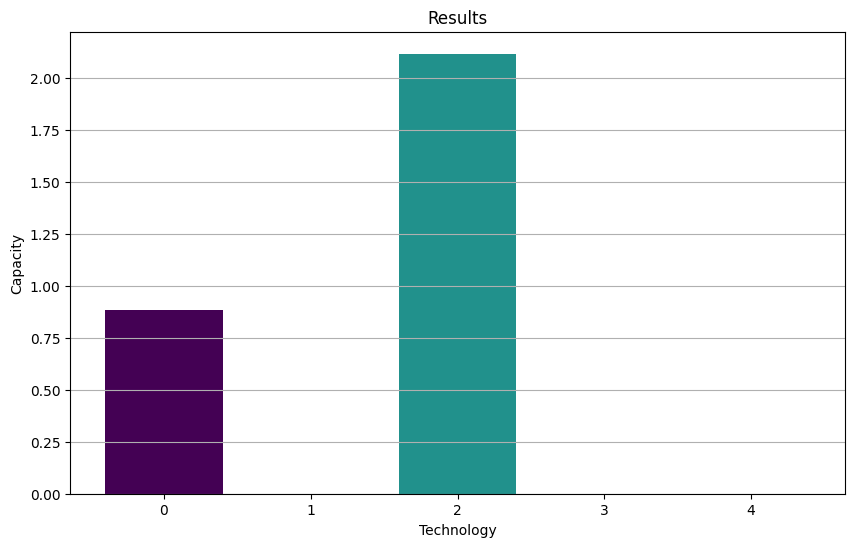

Time taken in seconds 1.4135997295379639


In [31]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,16.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/cases for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,3.2,5.5, 10] ]#add cost of usage

cset = costsvec*cases

randvals= np.random.uniform(size=cases*4)
mins = [0.6,0.7,0.5,0.9]
adds = [0.3,0.1,0.3,0.1] 
randvals =  cp.Parameter(shape=cases*4 ,value= [randvals[x*4+k]*adds[k]+mins[k]  for x in range(cases) for k in range(4)])
x=cp.Variable(len(cset) )

capacities =cp.Parameter(shape=4, value=[3,3,3,3])
#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:4]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3,4]) 
multidin2 = np.array([1,1,1,1,1])
constr = constr + [-x[base+k*5]@multidin2<= demands[(k//12)%27][k%3] for k in range(cases*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([0,5,10]) 
multiding = np.array([1,1,1])
constr = constr + [capacities[k]*randvals[(v//108)*4+k]-x[base+k+v*15]@multiding>=0.  for v in range(108*cases) for k in range(4)]
print(constr[-1])

cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [32]:
ntests=50
rndvl= np.random.uniform(size=cases*4*ntests)
rndvl = [[rndvl[x*4+k+t*cases*4]*adds[k]+mins[k]  for x in range(cases) for k in range(4)] for t in range(ntests)]
print(rndvl)
valuevector = []
for Val in tqdm(range(len(params))):
    capacities.value = params[Val]
    curval =params[Val]@[10.,7.,16.,6.]
    for t in rndvl:
        randvals.value = t
        lilproblem.solve(QCPDual = 1, solver  = cp.GUROBI, env=env )
        curval = curval +lilproblem.value/ntests
    valuevector = valuevector +[curval]

[[np.float64(0.6542396930658856), np.float64(0.726510680888838), np.float64(0.6046457126248134), np.float64(0.917013018521196)], [np.float64(0.865148160365717), np.float64(0.771636995173743), np.float64(0.7659612111582111), np.float64(0.901024248529157)], [np.float64(0.7496607793682204), np.float64(0.7600532570455452), np.float64(0.6638055069165937), np.float64(0.971076460747707)], [np.float64(0.6197279181164538), np.float64(0.7508390568465592), np.float64(0.5548776654246945), np.float64(0.9014223887927627)], [np.float64(0.7237067662596771), np.float64(0.7824789157207945), np.float64(0.7699981803698137), np.float64(0.9146604118384389)], [np.float64(0.8423445891285117), np.float64(0.7294001281209848), np.float64(0.590205352322014), np.float64(0.9040756040493291)], [np.float64(0.8021609487702306), np.float64(0.7005840504454861), np.float64(0.707305825739289), np.float64(0.959669676308395)], [np.float64(0.6214539846105885), np.float64(0.7426777243325041), np.float64(0.5948229621388565), n

100%|██████████| 150/150 [1:14:02<00:00, 29.61s/it]


<Axes: ylabel='Count'>

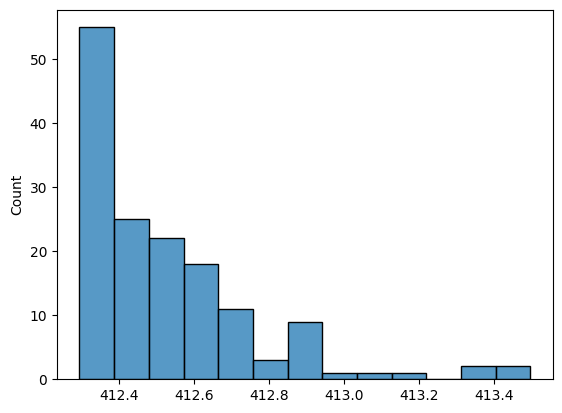

In [33]:
sns.histplot(valuevector)

In [34]:
pd.DataFrame(params).to_csv("BackupStorage-paramtests2-B")
pd.DataFrame(valuevector).to_csv("BackupStorage-results2-B")
pd.DataFrame(values).to_csv("BackupStorage-initialoutcomes2-B")

38883
[0, 1, 2, 3]
-var115387333[38879] + -var115387333[38880] + -var115387333[38881] + -var115387333[38882] <= -3.0
0.0 <= var115387333[2] @ param115387332[89] + -var115387333[38873] + -var115387333[38877] + -var115387333[38881]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100
Objective value: 411.3454165192656
Capacity of each technology: [5.80832512 5.22846392 1.59750296 3.         0.        ]
Investment costs for phase 1: 104.30639638949506
Production costs for phase 2: 307.03902012976545


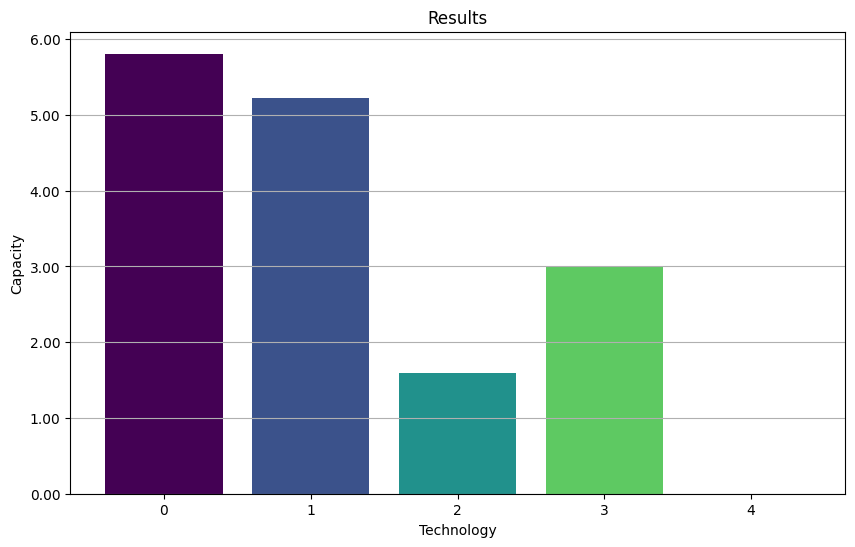

Time taken in seconds 431.8956470489502


In [35]:
nreal = 30
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/nreal for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,5.5, 10] ]#add cost of usage

cset = cinstall+costsvec*nreal

randvals= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals =  cp.Parameter(shape=nreal*3 ,value= [randvals[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)])
x=cp.Variable(len(cset) )


#phase 1 constraints
#budget
constr = [x>=0]
constr = constr+[x[0:3]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3]) 
multidin2 = np.array([1,1,1,1])
constr = constr + [-x[base[0]+k*4+3]-x[base[1]+k*4+3]-x[base[2]+k*4+3]-x[base[3]+k*4+3]<= demands[(k//12)%27][k%3] for k in range(nreal*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([3,7,11]) 
multiding = np.array([1,1,1])
constr = constr + [x[k]*randvals[(v//108)*3+k]-x[base[0]+k+v*12]-x[base[1]+k+v*12] -x[base[2]+k+v*12]>=0.  for v in range(108*nreal) for k in range(3)]
print(constr[-1])

cset = np.array(cset)
problem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= problem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

print(f'Time taken in seconds {t2-t1}')

In [36]:
rndvl= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)]
res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:3])
print(problem.value)
print(x.value[0:3]@[0.9,0.8,1.])
print(x.value[0:3]@cinstall)

[5.61041394 5.45544813 1.67969462]
412.1704017153203
11.093425664235765
104.37044397932137


In [37]:
params2 =[]
values2 = []
for o in tqdm(range(300)):
    rndvl= np.random.uniform(size=nreal*3)
    randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(nreal) for k in range(3)]
    res= problem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
    values2 = values2 + [problem.value]
    params2 = params2 + [x.value[0:3]]

100%|██████████| 300/300 [06:53<00:00,  1.38s/it]


[np.float64(409.0358102924207), np.float64(408.33848110327233), np.float64(409.4035857247577), np.float64(413.59503164391344), np.float64(413.6526867522474), np.float64(410.6658086885593), np.float64(410.8881910593359), np.float64(410.2235217306533), np.float64(410.62779015701125), np.float64(409.0234082262704), np.float64(409.3986194784808), np.float64(410.39879620984414), np.float64(410.67684574069085), np.float64(410.25937307087935), np.float64(410.9926911838726), np.float64(408.9526624476275), np.float64(411.30731995530056), np.float64(408.59494869391256), np.float64(408.19111268616757), np.float64(411.454097994021), np.float64(411.56896847383746), np.float64(409.3041905011282), np.float64(411.77917400929596), np.float64(407.914386425065), np.float64(411.18432937413263), np.float64(408.9749486843907), np.float64(410.9333075743571), np.float64(411.3310965836097), np.float64(411.10957970951137), np.float64(411.67023614811876), np.float64(411.3442475596221), np.float64(410.17691274689

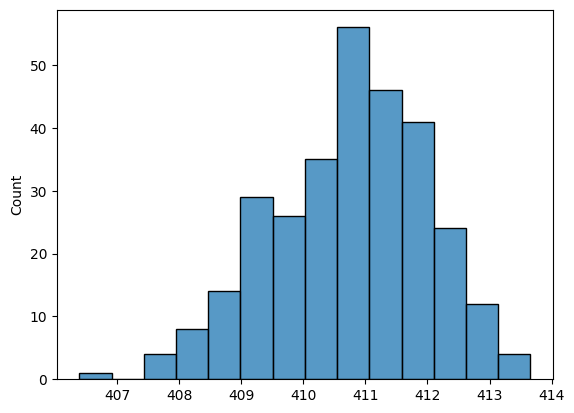

In [38]:
print(values2)
#print(params2)
sns.histplot(values2)
paramar2 = pd.DataFrame(params2,columns=["one","two","four"] )


In [39]:
paramar2.to_csv("BackupStorage-paramtests2")
#pandas.DataFrame(valuevector).to_csv("BackupStorage-results2")
pd.DataFrame(values2).to_csv("BackupStorage-initialoutcomes2")

### Cross Validation

1296
[0, 1, 2, 3]
-var115990006[1292] + -var115990006[1293] + -var115990006[1294] + -var115990006[1295] <= -3.0
0.0 <= param115990007[2] @ param115990005[2] + -var115990006[1286] + -var115990006[1290] + -var115990006[1294]
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-19
Set parameter TimeLimit to value 100


/Users/ecastillo/personal/rug/Optimization-under-Uncertainty/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:237: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Disciplined Parametrized Programming, at https://www.cvxpy.org/tutorial/dpp/index.html
  warnings.warn(DPP_ERROR_MSG)


Objective value: 325.5224434321666
Capacity of each technology: [2.98910661 0.01089339 0.         0.         0.        ]
Investment costs for phase 1: 1.16692941871267
Production costs for phase 2: 324.3555140134539


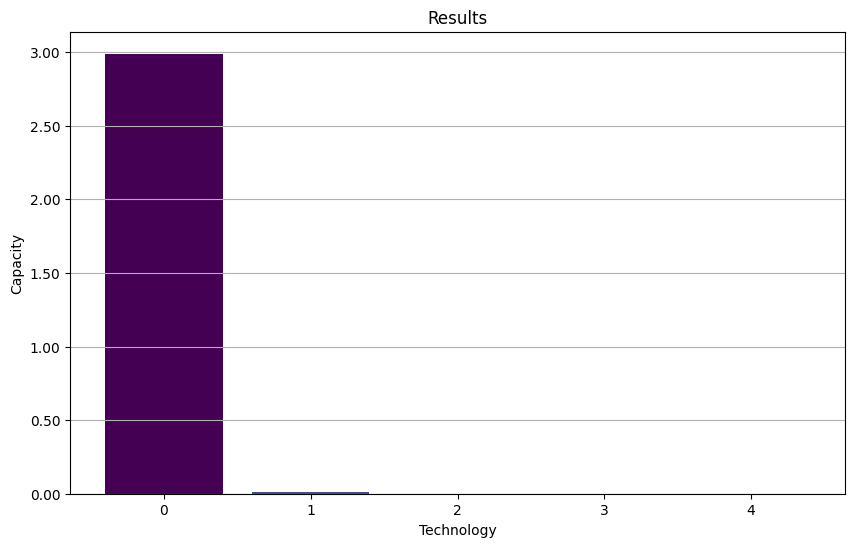

In [40]:
cases = 1
#we just take the all scenario set for these and then varry the supply limitations
demands = [[z,j,i] for i in [-1,-2,-3] for j in [-2,-3,-4] for z in  [-3,-5,-7] ]
probs = [z*j*i for i in [0.3,0.4,0.3] for j in [0.3,0.4,0.3] for z in [0.3,0.4,0.3]]
cinstall =[10.,7.,6.]   #costs for instalation
#costs
ps = [0.6,0.4]
ts2 = [5,7.5]
ts3 = [0.5,1.75]
timecostvecs = [[10*ps[a]*ps[b],ts2[a]*ps[a]*ps[b],ts3[b]*ps[a]*ps[b]] for a in range(2) for b in range(2)]
costsvec= [v*i*p/cases for p in probs for t in range(4) for v in timecostvecs[t]   for i in [4,4.5,5.5, 10] ]#add cost of usage

cset = costsvec*cases

randvals= np.random.uniform(size=cases*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals =  cp.Parameter(shape=cases*3 ,value= [randvals[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)])
x=cp.Variable(len(cset) )
suppl = cp.Parameter(shape=3, value=[4,4,4])

#phase 1 constraints
#budget
constr = [x>=0]
#constr = constr+[x[0:3]@cinstall<=120 ]

#energy requirement constraint
#not a hard constraint anymore but still sensible to have some version of it
#constr = constr + [x[0:4]@[0.9,0.8,0.8,1.]>= 5]

#phase 2 constaints
#energy supply
print(len(cset))

base= np.array([0,1,2,3]) 
multidin2 = np.array([1,1,1,1])
constr = constr + [-x[base[0]+k*4]-x[base[1]+k*4]-x[base[2]+k*4]-x[base[3]+k*4]<= demands[(k//12)%27][k%3] for k in range(cases*27*3*4)]
print([0,1,2,3,4][0:4])
print(constr[-1])
#capacity
base= np.array([0,4,8]) 
multiding = np.array([1,1,1])
constr = constr + [suppl[k]*randvals[(v//108)*3+k]-x[base[0]+k+v*12]-x[base[1]+k+v*12] -x[base[2]+k+v*12]>=0.  for v in range(108*cases) for k in range(3)]
print(constr[-1])

cset = np.array(cset)
lilproblem = cp.Problem(cp.Minimize(cset.T @x),constr )
t1 = time.time()
env = gurobipy.Env()
env.setParam('TimeLimit', 100)
res= lilproblem.solve(verbose = False, QCPDual = 1, solver  = cp.GUROBI, env=env)

t2 = time.time()
pl.print_solution(x,cset,n)
pl.plot_result(x,cset,n)

In [41]:
rndvl= np.random.uniform(size=nreal*3)
mins = [0.6,0.7,0.9]
adds = [0.3,0.1,0.1] 
randvals.value = [rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)]
res= lilproblem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
print(x.value[0:3])
print(lilproblem.value)
print(x.value[0:3]@[0.9,0.8,1.])
print(x.value[0:3]@cinstall)

[2.92690841 0.07309159 0.        ]
326.85139412600165
2.692690840708292
29.78072522124876


In [42]:
tests=60
valuevector =[]
parsset = paramar2.to_numpy()
testpars = [[rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)] for p in range(tests)]
for t in tqdm(range(len(paramar2))):
    suppl.value = parsset[t]
    curv = parsset[t]@[10.,7.,6.]
    for q in testpars:
        randvals.value =q
        res= lilproblem.solve( QCPDual = 1, solver  = cp.GUROBI, env=env)
        curv = curv + lilproblem.value/tests
    valuevector = valuevector+[curv]

100%|██████████| 300/300 [2:04:07<00:00, 24.82s/it]  


[np.float64(414.40739217613555), np.float64(414.29675782982036), np.float64(414.3371053192161), np.float64(415.16519637981594), np.float64(415.58085967657183), np.float64(414.2809064857293), np.float64(414.4938010683127), np.float64(414.3517845247295), np.float64(414.1235645273876), np.float64(414.2161282016371), np.float64(414.5132566116117), np.float64(414.44784653478894), np.float64(414.3001857543337), np.float64(414.44195126004786), np.float64(414.48929764490066), np.float64(414.3304804399882), np.float64(414.9790771166762), np.float64(414.15115944336316), np.float64(414.38171839387746), np.float64(414.8649282791135), np.float64(414.20168536730665), np.float64(414.4516935847256), np.float64(414.3252004927932), np.float64(414.28914389585583), np.float64(414.31898038152195), np.float64(414.1563901498463), np.float64(414.28129436744274), np.float64(414.8029713441212), np.float64(414.2709164356488), np.float64(414.3011849484343), np.float64(414.5308202150023), np.float64(414.4927474411

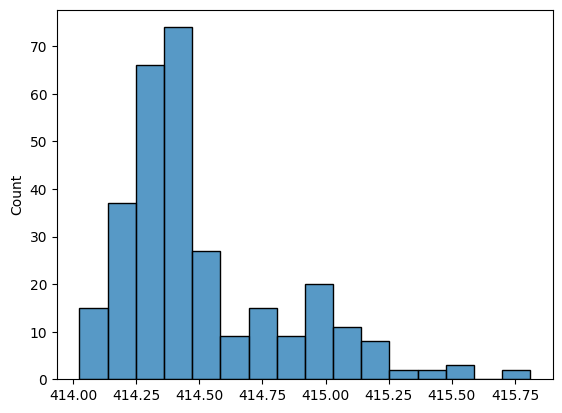

In [43]:
print(valuevector)
pd.DataFrame(valuevector).to_csv("BackupStorage-results2")
sns.histplot(valuevector)
print(min(valuevector))
print(parsset[valuevector.index(min(valuevector))] )

In [44]:
tests=150
valuevectortest =[]
parsset = paramar2.to_numpy()
testpars = [[rndvl[x*3+k]*adds[k]+mins[k]  for x in range(cases) for k in range(3)] for p in range(tests)]
for t in tqdm(range(300)):
    suppl.value = parsset[t]
    curv = parsset[t]@[10.,7.,6.]
    for q in testpars:
        randvals.value =q
        res= lilproblem.solve(  solver  = cp.GUROBI, env=env)
        curv = curv + lilproblem.value/tests
    valuevectortest = valuevectortest+[curv]

100%|██████████| 300/300 [5:09:07<00:00, 61.83s/it]  


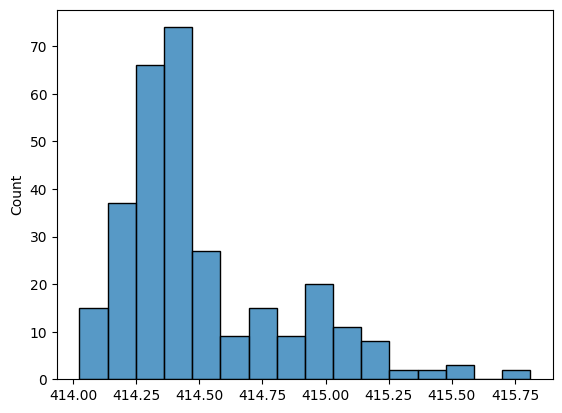

In [45]:
sns.histplot(valuevectortest)
pd.DataFrame(valuevectortest).to_csv("BackupStorage-results2-2")